In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import handcalcs.render
from scipy.optimize import fsolve

### Метод простих ітерацій

Розв'яжемо систему нелінійних рівнянь
$$ \left\{\begin{array}{l}\sin y+2 x=2 \\ 
\cos (x-1)+y=0,7\end{array}\right.$$

In [169]:
def F2(variables) :
    (x,y)= variables
    f1 = 2 - np.sin(y) - 2*x
    f2 = 0.7 - np.cos(x-1) - y
    return [f1,f2]

In [170]:
result2 = fsolve(F2, (1, 1)) 
print(result2)

[ 1.14288476 -0.28980933]


In [172]:
print (F2(result2))

[-2.1316282072803006e-14, -2.3425705819590803e-14]


In [9]:
x1 = lambda y1: -(np.sin(y1))/2 +1
y2 = lambda x2: 0.7 - (np.cos(x2-1))

/tmp/ipykernel_5495/618203720.py:14: RuntimeWarning: invalid value encountered in arcsin
  idx = np.argwhere(np.diff(np.sign(np.arcsin(2-2*x) - y2(x)))).flatten()
/tmp/ipykernel_5495/618203720.py:15: RuntimeWarning: invalid value encountered in arcsin
  plt.plot(x[idx], np.arcsin(2-2*x)[idx], 'kX', label="Intersection point (x*, y*)")


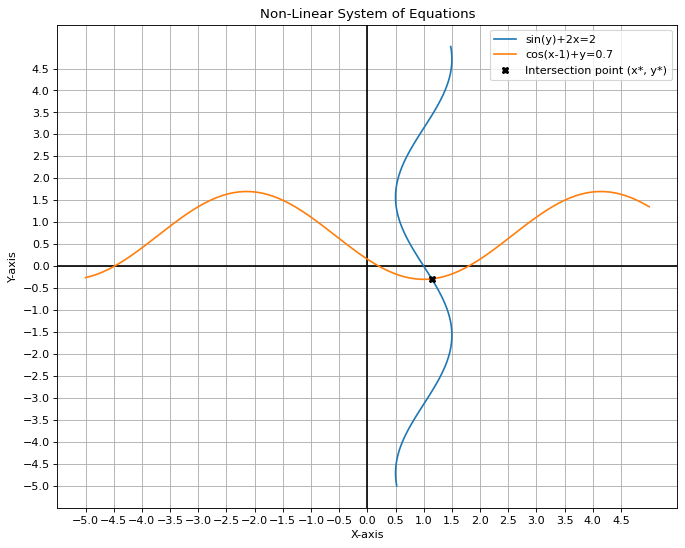

In [10]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Non-Linear System of Equations')
x = np.linspace(-5,5,100)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.plot(x1(x), x, label="sin(y)+2x=2")
plt.plot(x, y2(x), label="cos(x-1)+y=0.7")
plt.yticks(np.arange(-5,5,0.5))
plt.xticks(np.arange(-5,5,0.5))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

x = np.arange(0, 1.2, 0.01)
idx = np.argwhere(np.diff(np.sign(np.arcsin(2-2*x) - y2(x)))).flatten()
plt.plot(x[idx], np.arcsin(2-2*x)[idx], 'kX', label="Intersection point (x*, y*)")

plt.grid(True)
plt.legend()
plt.savefig('task1_nonlinear.jpg', dpi = 300)
plt.show()

### Функція для розв'язання нелійнійних систем методом простих ітерацій

In [163]:
eps = 0.00001
appr = np.array([1.143, -0.29])

In [164]:
def simple_iter_solve(x1, y2, appr, eps):
    find_appr = lambda a0, a1: max(abs(a1[0]-a0[0]), abs(a1[1]-a0[1]))
    res, appr_hist = [], []
    while True:
        new_appr = np.array([round(x1(appr[1]), 6), round(y2(appr[0]),6)])
        res.append(new_appr)
        appr_hist.append(find_appr(appr, new_appr))
        if find_appr(appr, new_appr) < eps:
            break
        appr = copy.deepcopy(new_appr)
    return new_appr, np.array(res), np.array(appr_hist)

In [165]:
solution, iter_sol, approximations = simple_iter_solve(x1, y2, appr, eps)
solution, iter_sol, approximations 

(array([ 1.142885, -0.28981 ]),
 array([[ 1.142976, -0.289793],
        [ 1.142877, -0.289796],
        [ 1.142878, -0.28981 ],
        [ 1.142885, -0.28981 ]]),
 array([2.07e-04, 9.90e-05, 1.40e-05, 7.00e-06]))

In [166]:
for i in approximations:
    print("%01.6f" % round(i,6))

0.000207
0.000099
0.000014
0.000007


In [175]:
appr

array([ 1.143, -0.29 ])

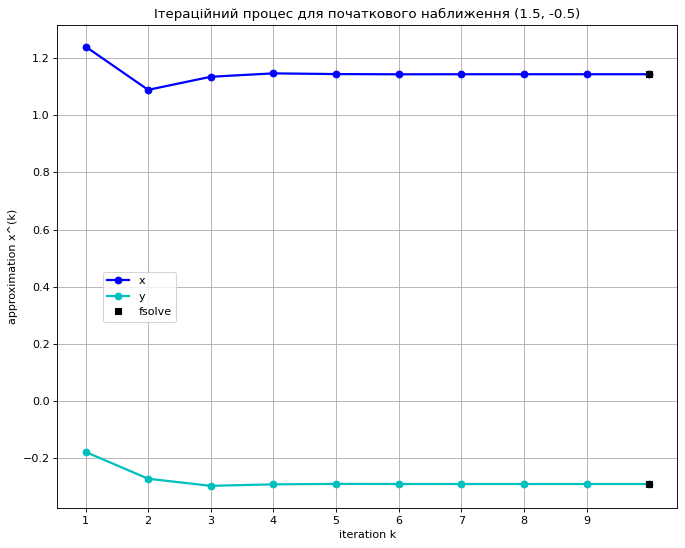

In [179]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Ітераційний процес для початкового наближення (1.5, -0.5)')
plt.grid(True)
for i, j in enumerate(np.transpose(simple_iter_solve(x1, y2, [1.5, -0.5], eps)[1])):
    plt.plot([i+1 for i in range(np.transpose(simple_iter_solve(x1, y2, [1.5, -0.5], eps)[1]).shape[1])], j, ['b-o', 'c-o'][i], 
             linewidth=2, label=["x", "y"][i])
# plt.yticks(np.arange(-0.5, 1.5, 0.05))
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('iteration k')
plt.ylabel('approximation x^(k)')
plt.plot( np.full((2,), 10, dtype=int), result2, 'ks', label="fsolve")
plt.legend(bbox_to_anchor=(0.2, 0.5))
plt.savefig('convergence_iter_seq.jpg', dpi = 300)
plt.show()

In [40]:
appr

array([ 1.143, -0.29 ])

### Інші початкові наближення

In [48]:
appr_list = [[2.5, -2.5], [0.01, -50], [-4,-0.3]]

In [51]:
for pair in appr_list:
    print('Numb of iter: ', simple_iter_solve(x1, y2, pair, eps)[2].shape, end=' ')
    print(", result: ", simple_iter_solve(x1, y2, pair, eps)[0])

Numb of iter:  (11,) , result:  [ 1.142885 -0.289809]
Numb of iter:  (10,) , result:  [ 1.142884 -0.289809]
Numb of iter:  (10,) , result:  [ 1.142886 -0.289809]


### Перевірка

$$ \left\{\begin{array}{l}\sin y+2 x=2 \\ 
\cos (x-1)+y=0,7\end{array}\right.$$

In [58]:
x_ch = lambda y_c: np.arccos(0.7-y_c) + 1
y_ch = lambda x_c: np.arcsin(2-2*x_c)

In [59]:
solution

array([ 1.142885, -0.28981 ])

In [60]:
x_ch(solution[1])

1.1428800419755714

In [61]:
y_ch(solution[0])

-0.28980983970736446

In [79]:
import math
import matplotlib.patches as mpatches

### Метод Ньютона

Розв'яжемо систему нелінійних рівнянь
$$
\left\{\begin{array}{l}\operatorname{tg}(x y+0,4)=x^{2} \\
0,8 x^{2}+2 y^{2}=1\end{array}\right.
$$

In [65]:
def F(variables) :
    (x,y)= variables
    f1 = np.tan(x*y +0.4) - x**2
    f2 = 0.8*x**2 + 2*y**2 - 1
    return [f1,f2]

In [66]:
result = fsolve(F, (1, 1)) 
print(result)

[0.96195361 0.36035829]


In [75]:
func1= lambda x,y: np.tan(x*y+0.4)-x**2
func2 = lambda x,y: 0.8*x**2+2*y**2-1

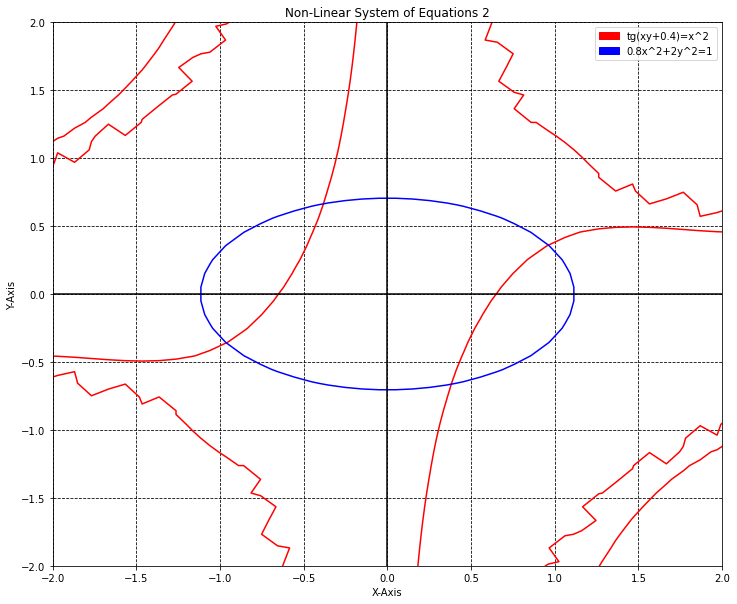

In [90]:
fig, axes = plt.figure(), plt.axes()
plt.axhline(0, color='k')
plt.axvline(0, color='k')
axes.grid(color='k', linestyle='--')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
a, b = np.meshgrid(x, y)
axes.set(xlim=[-2, 2],
ylim=[-2, 2],title='Non-Linear System of Equations 2', xlabel="X-Axis", ylabel="Y-Axis")

F1 = np.tan(a*b+0.4)-a**2
F2 = 0.8*a**2+2*b**2- 1
axes.contour(a, b, F1, [0], colors='r')
axes.contour(a, b, F2, [0], colors='b')

red_patch = mpatches.Patch(color='red',linestyle='-',label='tg(xy+0.4)=x^2')
blue_patch = mpatches.Patch(color='blue',linestyle='-', label='0.8x^2+2y^2=1')
patches = [red_patch, blue_patch]
axes.legend(handles=patches,loc='upper right')
fig.set_size_inches(12, 10)
fig.savefig('task2_nonlinear.jpg', dpi = 300)

### Функція для розв'язання нелійнійних систем методом Ньютона

In [93]:
eps = 0.00001
appr = np.array([0.95, 0.3728])

In [94]:
func1= lambda x,y: np.tan(x*y+0.4)-x**2
func2 = lambda x,y: 0.8*x**2+2*y**2-1

In [95]:
yak_df1_x = lambda x,y: (y/np.cos(x*y+0.4)**2)-2*x
yak_df1_y = lambda x,y: (x/np.cos(x*y+0.4)**2)
yak_df2_x = lambda x,y: 1.6*x 
yak_df2_y = lambda x,y: 4*y

In [143]:
def newtons_method_solve(x, y, appr, eps):
    find_appr = lambda l: max(abs(l[0]),abs(l[1]))
    res, appr_hist = [], []
    while True:
        yakobi_matr= np.array([[yak_df1_x(appr[0], appr[1]), 
                                yak_df1_y(appr[0], appr[1])],
                           [yak_df2_x(appr[0], appr[1]), 
                            yak_df2_y(appr[0], appr[1])]])
        f_appr = np.array([-func1(appr[0], appr[1]), 
                           -func2(appr[0], appr[1])])
        appr_x = np.linalg.solve(yakobi_matr, f_appr)
        appr = appr + appr_x
        res.append(appr)
        appr_hist.append(find_appr(appr_x))
        if find_appr(appr_x) < eps:
            break
    return appr, np.array(res), np.array(appr_hist)

In [133]:
solution, newt_iters, approximations = newtons_method_solve(x, y, appr, eps)
solution, newt_iters, approximations

(array([0.96195361, 0.36035829]),
 [array([0.96222914, 0.36036171]),
  array([0.96195365, 0.36035829]),
  array([0.96195361, 0.36035829])],
 [0.012438285969650409, 0.00027548671910544053, 4.1531855722066935e-08])

In [129]:
for i in approximations:
    print("%01.8f" % round(i,8))

0.01243829
0.00027549
0.00000004


### Перевірка

$$
\left\{\begin{array}{l}\operatorname{tg}(x y+0,4)=x^{2} \\
0,8 x^{2}+2 y^{2}=1\end{array}\right.
$$

In [136]:
func1= lambda x,y: np.tan(x*y+0.4)-x**2
func2 = lambda x,y: 0.8*x**2+2*y**2-1

In [139]:
round(func1(solution[0], solution[1]),5)

-0.0

In [140]:
round(func2(solution[0], solution[1]),5)

0.0

### Інші початкові наближення

In [141]:
appr_list = [[2.5, -2.5], [0.01, -50], [-4,-0.3]]

In [144]:
for pair in appr_list:
    print('Numb of iter: ', newtons_method_solve(x, y, pair, eps)[2].shape, end=' ')
    print(", result: ", newtons_method_solve(x, y, pair, eps)[0])

Numb of iter:  (8,) , result:  [ 0.38293531 -0.66433743]
Numb of iter:  (10,) , result:  [ 0.38293531 -0.66433743]
Numb of iter:  (7,) , result:  [-0.96195361 -0.36035829]


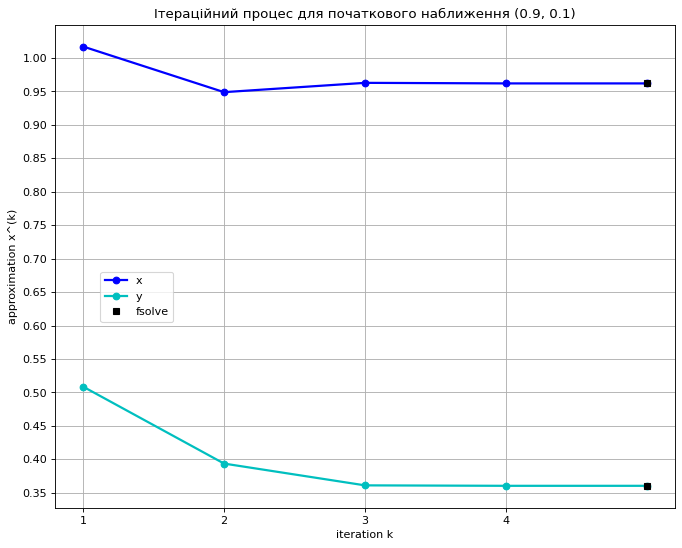

In [159]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Ітераційний процес для початкового наближення (0.9, 0.1)')
plt.grid(True)
for i, j in enumerate(np.transpose(newtons_method_solve(x, y, [0.9, 0.1], eps)[1])):
    plt.plot([i+1 for i in range(np.transpose(newtons_method_solve(x, y, [0.9, 0.1], eps)[1]).shape[1])], j, ['b-o', 'c-o'][i], 
             linewidth=2, label=["x", "y"][i])
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(1, 5, 1))
plt.xlabel('iteration k')
plt.ylabel('approximation x^(k)')
plt.plot( np.full((2,), 5, dtype=int), result, 'ks', label="fsolve")
plt.legend(bbox_to_anchor=(0.2, 0.5))
plt.savefig('convergence_newt_seq.jpg', dpi = 300)
plt.show()